In [1]:
using Plots
using QuantumOptics
using LinearAlgebra

In [2]:
#Parameters and constants
I=diagm(ones(2))
σm=[0 0;1 0]
σp=[0 1;0 0]
σz=[1 0; 0 -1]
ω=1
ωₛ=2
m=1
λ=2

2

In [3]:
#Total Hamiltonian

function Htotal(x,p)
    a=x*(sqrt(m*ω/2))+im*p/(sqrt(2*m*ω))                                       #a of oscillator
    ap=x*(sqrt(m*ω/2))-im*p/(sqrt(2*m*ω))                                      #a† of oscillator
    H_oscillator=((p^2)/(2*m)+(m*ω^2*x^2)*(1/2))*(kron(I,I))                   #oscillator hamiltonian
    H_spin=(ωₛ/2)*(kron(σz,I)+kron(I,σz))                                      #spin hamiltonian
    H_osc_spin=(g₁/2)*(kron((a*σp+ap*σm),I))+(g₂/2)*(kron(I,(a*σp+ap*σm)))     #oscillator and spin interaction hamiltonian
    H_spin_spin=(λ/2)*(kron(σp,σm)+kron(σm,σp))                                #spin spin interaction
    return H_oscillator + H_spin+ H_osc_spin+H_spin_spin
end

Htotal (generic function with 1 method)

In [4]:
#Quantum Hamiltonian(excluding Oscillator part cz its classical)

function Hspin(x,p)
    a=x*(sqrt(m*ω/2))+im*p/(sqrt(2*m*ω))
    ap=x*(sqrt(m*ω/2))-im*p/(sqrt(2*m*ω))
    H_spin=(ωₛ/2)*(kron(σz,I)+kron(I,σz))
    H_osc_spin=(g₁/2)*(kron((a*σp+ap*σm),I))+(g₂/2)*(kron(I,(a*σp+ap*σm)))
    H_spin_spin=(λ/2)*(kron(σp,σm)+kron(σm,σp))
    return H_spin+ H_osc_spin+H_spin_spin
end

Hspin (generic function with 1 method)

In [5]:
#expectation of H in Total Hamiltonian
function extotal(x,p,ψ)
    return real(ψ'*Htotal(x,p)*ψ)
end

#expectation of H in quantum Hamiltonian
function exspin(x,p,ψ)
    return real(ψ'*Hspin(x,p)*ψ)
end

exspin (generic function with 1 method)

In [6]:
function Entropy(Ψ)
    ρ = Ψ*Ψ'
    a = ρ[1,1]+ρ[2,2]
    b = ρ[3,3]+ρ[4,4]
    return -real(( a*log(complex(a)) + b*log(complex(b)) ))
end

Entropy (generic function with 1 method)

In [9]:
# for g=1.5


g₁=1.5
g₂=1.5
N=500000
dt=0.0001
dx=0.0001
dp=0.0001
Nd=Int(0.001/dt)
x0=0                 #initial x
p0=1                   #initail p
x=[0.1]
p=[0]
t=[0]
ψ0=[1;0;0;0]           #startinng wavefunction
Eo=[(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2]
Ess=[exspin(x0,p0,ψ0)]
E=[Entropy(ψ0)]
for i in 2:N
    ψn=(diagm(ones(4))-(Hspin(x0,p0)*dt*im))*ψ0                  #time evolution of ψ
    xn=x0+((extotal(x0,p0+dp,ψ0)-extotal(x0,p0,ψ0))/(dp))*(dt)   #time evolution of x
    pn=p0-((extotal(x0+dx,p0,ψ0)-extotal(x0,p0,ψ0))/(dx))*(dt)   #time evolution of p
    if i%Nd==0
        x=vcat(x,xn)
        p=vcat(p,pn)
        t=vcat(t,last(t)+dt)
        Eo=vcat(Eo,(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2)
        Ess=vcat(Ess,exspin(x0,p0,ψ0))
        E=vcat(E,Entropy(ψ0))
    end
    x0=xn
    p0=pn
    ψ0=ψn
end

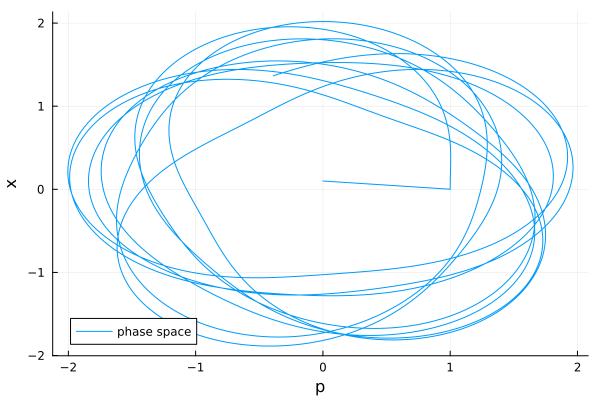

In [10]:
plot(p,x,label="phase space",xlabel="p",ylabel="x")

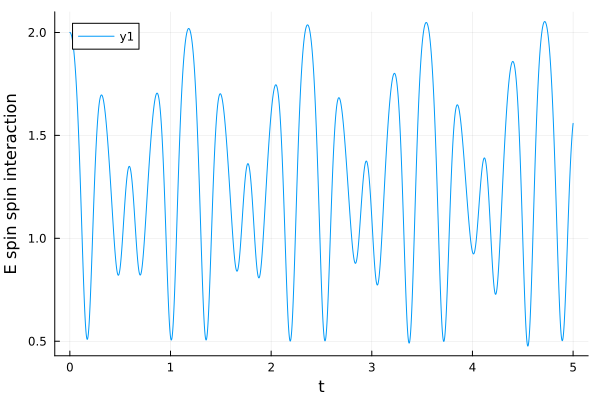

In [11]:
plot(t,Ess,ylabel="E spin spin interaction",xlabel="t")

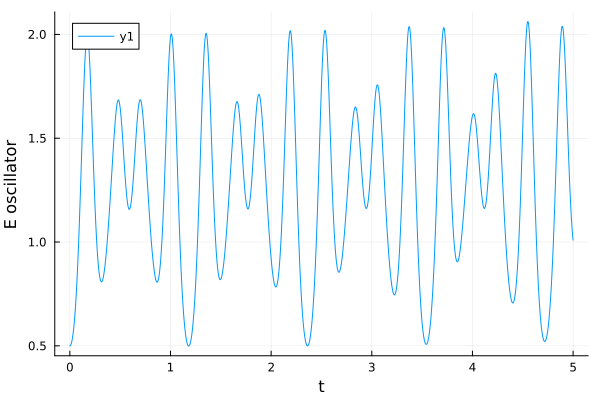

In [12]:
plot(t,Eo,ylabel="E oscillator",xlabel="t")

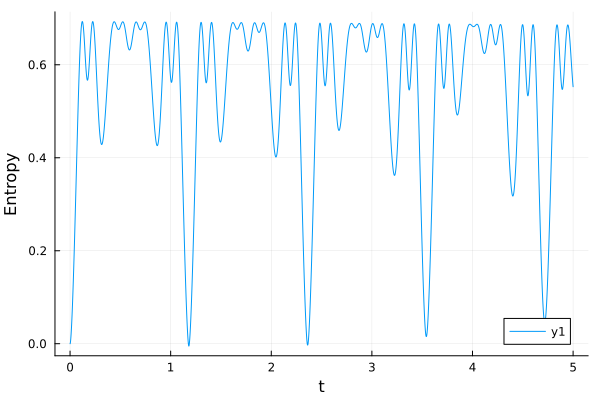

In [13]:
plot(t,E,ylabel="Entropy",xlabel="t")

In [14]:
# for g=0.1

g₁=0.1
g₂=0.1
N=500000
dt=0.0001
dx=0.0001
dp=0.0001
Nd=Int(0.001/dt)
x0=0                 #initial x
p0=1                   #initail p
x=[0.1]
p=[0]
t=[0]
ψ0=[1;0;0;0]           #startinng wavefunction
Eo=[(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2]
Ess=[exspin(x0,p0,ψ0)]
E=[Entropy(ψ0)]
for i in 2:N
    ψn=(diagm(ones(4))-(Hspin(x0,p0)*dt*im))*ψ0                  #time evolution of ψ
    xn=x0+((extotal(x0,p0+dp,ψ0)-extotal(x0,p0,ψ0))/(dp))*(dt)   #time evolution of x
    pn=p0-((extotal(x0+dx,p0,ψ0)-extotal(x0,p0,ψ0))/(dx))*(dt)   #time evolution of p
    if i%Nd==0
        x=vcat(x,xn)
        p=vcat(p,pn)
        t=vcat(t,last(t)+dt)
        Eo=vcat(Eo,(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2)
        Ess=vcat(Ess,exspin(x0,p0,ψ0))
        E=vcat(E,Entropy(ψ0))
    end
    x0=xn
    p0=pn
    ψ0=ψn
end

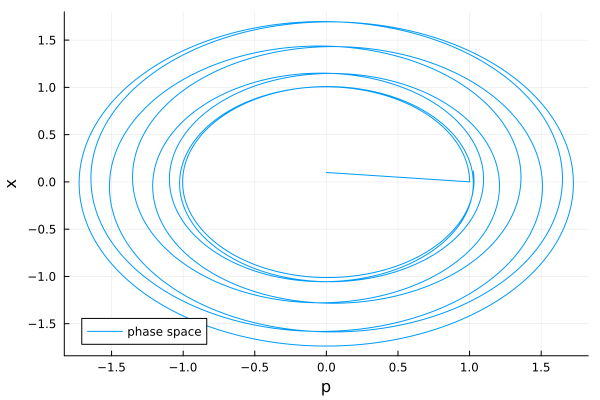

In [15]:
plot(p,x,label="phase space",xlabel="p",ylabel="x")

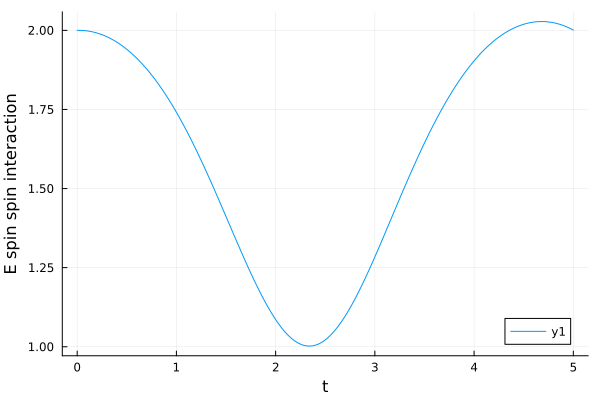

In [16]:
plot(t,Ess,ylabel="E spin spin interaction",xlabel="t")

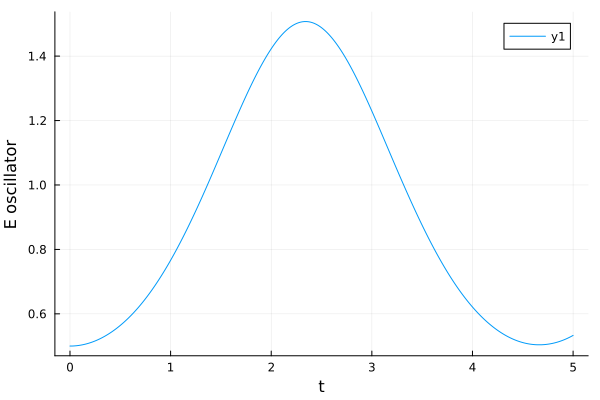

In [17]:
plot(t,Eo,ylabel="E oscillator",xlabel="t")

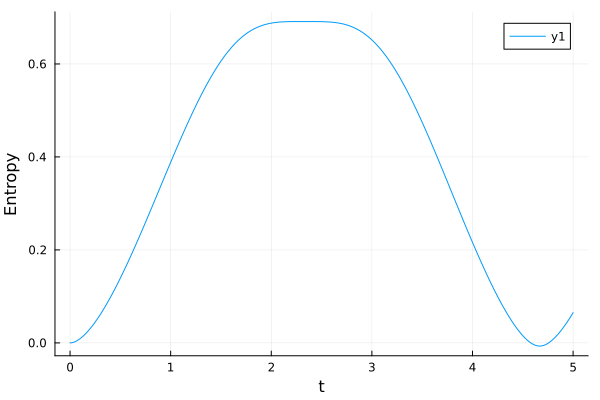

In [18]:
plot(t,E,ylabel="Entropy",xlabel="t")

In [19]:
# for g=0.001

g₁=0.0001
g₂=0.0001
N=500000
dt=0.0001
dx=0.0001
dp=0.0001
Nd=Int(0.001/dt)
x0=0                 #initial x
p0=1                   #initail p
x=[0.1]
p=[0]
t=[0]
ψ0=[1;0;0;0]           #startinng wavefunction
Eo=[(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2]
Ess=[exspin(x0,p0,ψ0)]
E=[Entropy(ψ0)]
for i in 2:N
    ψn=(diagm(ones(4))-(Hspin(x0,p0)*dt*im))*ψ0                  #time evolution of ψ
    xn=x0+((extotal(x0,p0+dp,ψ0)-extotal(x0,p0,ψ0))/(dp))*(dt)   #time evolution of x
    pn=p0-((extotal(x0+dx,p0,ψ0)-extotal(x0,p0,ψ0))/(dx))*(dt)   #time evolution of p
    if i%Nd==0
        x=vcat(x,xn)
        p=vcat(p,pn)
        t=vcat(t,last(t)+dt)
        Eo=vcat(Eo,(p0^2)/(2*m)+((ω^2)*(x0^2)*m)/2)
        Ess=vcat(Ess,exspin(x0,p0,ψ0))
        E=vcat(E,Entropy(ψ0))
    end
    x0=xn
    p0=pn
    ψ0=ψn
end

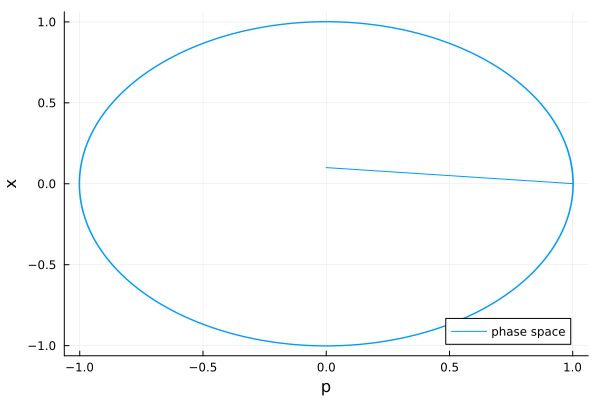

In [20]:
plot(p,x,label="phase space",xlabel="p",ylabel="x")

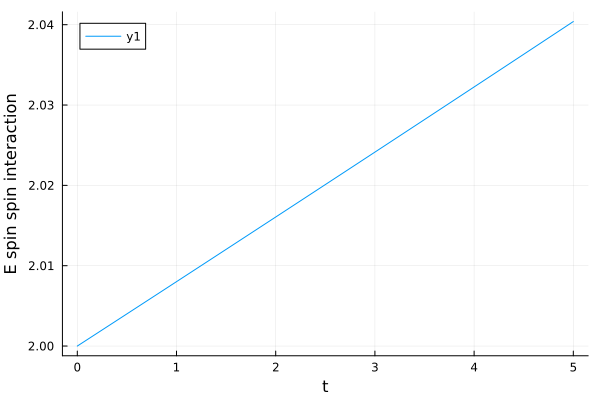

In [21]:
plot(t,Ess,ylabel="E spin spin interaction",xlabel="t")

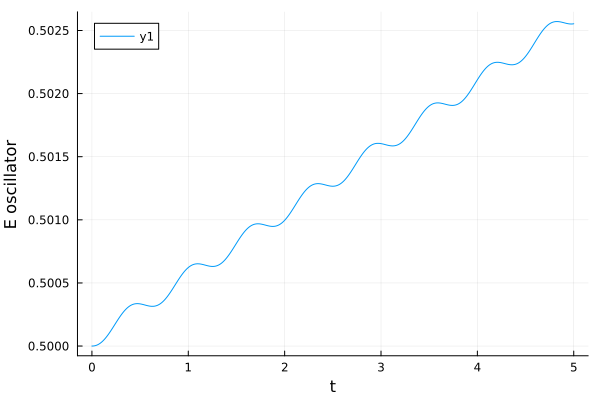

In [22]:
plot(t,Eo,ylabel="E oscillator",xlabel="t")

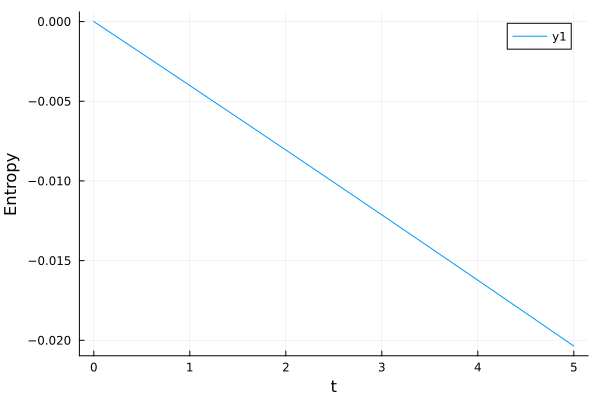

In [23]:
plot(t,E,ylabel="Entropy",xlabel="t")